In [48]:
import csv
import glob
import os
import re
import random
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
os.chdir('C://Users//Ruben//Documents//Scriptie//test-scripts///metadata')
csv_filenames = glob.glob('*.csv')

In [41]:
counts = pd.DataFrame()

for csv in csv_filenames:
    df = pd.read_csv(csv, sep = "\t")
    df['date'] = df['date'].str[:4]
    df['date'] = df['date'].astype(int)
    
    csv_count = dict()
    
    for year in list(set(df.date)):
        y_df = df[df['date'] == year]
        
        year_count = 0
        
        for art in y_df.ocr:
            tmp = len(art)
            year_count = year_count + tmp
        
        yc_v = {year:year_count}
        csv_count.update(yc_v)
    
    csv_count_df = pd.DataFrame(list(csv_count.items()), columns=['year', 'char_count'])
    csv_count_df['title'] = csv[0:3]
    
    counts = counts.append(csv_count_df)   
counts = counts.pivot(index='year',columns='title')
counts['Total'] = counts.sum(axis=1)

In [47]:
plt.bar(list(counts.index, list(counts.Total), align='center', alpha=0.5)
#plt.title('No. of Characters a Year')
 
plt.show()

SyntaxError: invalid syntax (<ipython-input-47-fbe4b4387135>, line 4)

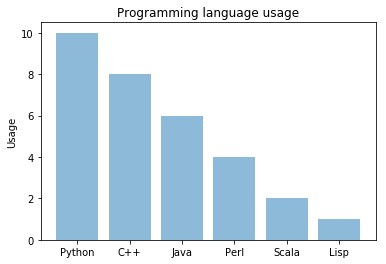

In [49]:
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

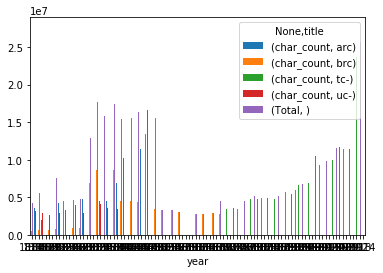

In [54]:
counts.plot.bar(rot=0)